<a href="https://colab.research.google.com/github/chetan015/deep-learning/blob/master/Assignment-04/Assignment-04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


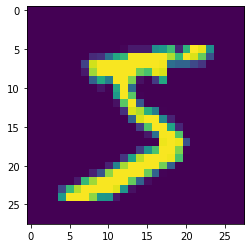

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))
# model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
# model.add(Convolution2D(32, 3, 3, activation='relu')) #24

# model.add(Convolution2D(16,1)) #24
# model.add(MaxPooling2D(pool_size=(2, 2))) #12

# model.add(Convolution2D(16, 3, 3, activation='relu')) #10
# model.add(Convolution2D(32, 3, 3, activation='relu')) #8

# model.add(Convolution2D(8,1)) #8
# model.add(MaxPooling2D(pool_size=(2, 2))) #4

# model.add(Convolution2D(16,3,3,activation='relu')) #2

# # Make the output 1,1,10
# model.add(Convolution2D(10, 2))
# Vanilla Network
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26

model.add(Convolution2D(10, 3, 3, activation='relu')) #24
model.add(Convolution2D(20, 3, 3, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2))) #11
model.add(Convolution2D(10,1,1,activation='relu')) 

model.add(Convolution2D(10, 3, 3, activation='relu')) #9
model.add(Convolution2D(20, 3, 3, activation='relu')) #7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

RuntimeError: ignored

In [0]:
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

In [0]:
# Adding batch normalization to vanilla network
model2 = Sequential()


model2.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model2.add(BatchNormalization())

model2.add(Convolution2D(10, 3, 3, activation='relu')) #24
model2.add(BatchNormalization())
model2.add(Convolution2D(20, 3, 3, activation='relu')) #22
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2))) #11
model2.add(Convolution2D(10,1,1,activation='relu')) #11
model2.add(BatchNormalization()) 

model2.add(Convolution2D(10, 3, 3, activation='relu')) #9
model2.add(BatchNormalization())
model2.add(Convolution2D(20, 3, 3, activation='relu')) #7
model2.add(BatchNormalization())

model2.add(Convolution2D(10, 1, activation='relu')) #7
model2.add(BatchNormalization())

model2.add(Convolution2D(10, 7))
model2.add(Flatten())
model2.add(Activation('softmax'))


model2.summary()
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test))

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)
# Adding batch normalization improves validation accuracy to 99.05%

In [0]:
model2 = Sequential()

model2.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model2.add(BatchNormalization())
model.add(Dropout(0.1))

model2.add(Convolution2D(16, 3, 3, activation='relu')) #24
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(10,1,1,activation='relu')) #24

model2.add(MaxPooling2D(pool_size=(2, 2))) #12

model2.add(Convolution2D(16, 3, 3, activation='relu')) #10
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(16, 3, 3, activation='relu'))#8
model2.add(BatchNormalization())
model2.add(Dropout(0.1))


model2.add(Convolution2D(16, 3, 3, activation='relu'))#6
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(16, 3, 3, activation='relu'))#4
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(10,4,4))
model2.add(Flatten())
model2.add(Activation('softmax'))


model2.summary()
model2.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

In [0]:
# before adjusting lr = val. acc = 99.03
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1,validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()